# Machine Learning Algorithms


In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

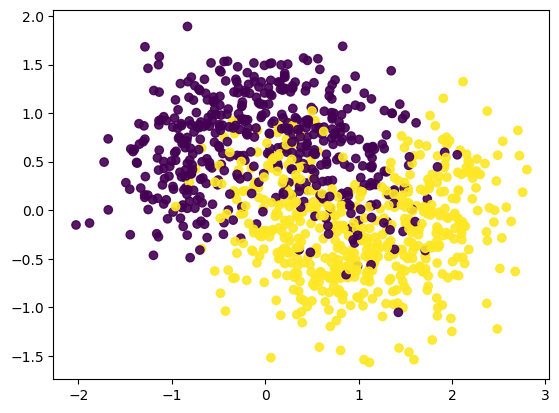

In [4]:
# Generating Data from Sciket learn dataset
from sklearn.datasets import make_moons
(X, y) = make_moons(n_samples=10000, noise=0.4, random_state=0)

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Scatter Plot
plt.scatter(X[0:1000,0],X[0:1000,1], c = y[0:1000], alpha = 0.9)
plt.show()

As we can see from the figure, the two classes does not seem to be linearly separable and can create some challenges for classification. Let us try different models to complete the classification task and check their performance.


In [5]:
# Training a Decision tree Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient
dt_params = {'max_depth':  range(1,11)}
grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 11)})

In [6]:
best_max_depth = grid_tree.best_params_['max_depth']
print("Best_max_depth chosen is: ",best_max_depth)

Best_max_depth chosen is:  4


In [7]:
test_accuracy = grid_tree.score(X_test, y_test)
print("The test accuracy under best model is: ", test_accuracy)

The test accuracy under best model is:  0.8492


In [8]:
mean_validation_score = grid_tree.cv_results_['mean_test_score'][best_max_depth-1]
print("mean validation score is: ", mean_validation_score)

mean validation score is:  0.8574666666666667


In [9]:
# Training Kernel SVM Classifier with Grid Search and Cross Validation

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state = 0, kernel = 'rbf')
param_svc_kernel = {'C': [0.1, 1, 10]  ,
                    'gamma': [0.01,1,10]} 
grid_svc = GridSearchCV(svc, param_svc_kernel, cv = 5, n_jobs=2)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=2,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 1, 10]})

In [10]:
grid_svc.best_params_

{'C': 10, 'gamma': 10}

In [11]:
test_accuracy_svm = grid_svc.score(X_test, y_test)
print("The test accuracy under the best model: ", test_accuracy_svm)

The test accuracy under the best model:  0.8644


In [12]:
best_index = grid_svc.best_index_
mean_score_svm = grid_svc.cv_results_['mean_test_score'][best_index]
print("The mean validation accuracy through the CV is:", mean_score_svm)

The mean validation accuracy through the CV is: 0.8664


In [13]:
best_c = grid_svc.best_params_['C']

In [14]:
best_gamma = grid_svc.best_params_['gamma']

In [15]:
# Naive Bayes model training

from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_train, y_train)
test_accuracy_naive = g_nb.score(X_test, y_test)
print("Test accuracy of naive bayes model is:",test_accuracy_naive )

Test accuracy of naive bayes model is: 0.8272


In [16]:
train_accuracy_naive = g_nb.score(X_train, y_train)
print("Training accuract of the naive bayes model is:",train_accuracy_naive) 

Training accuract of the naive bayes model is: 0.8336


In [17]:
# Training Linear SVM

from sklearn.svm import LinearSVC
lr_svc = LinearSVC(random_state = 0)
lr_svc.fit(X_train, y_train)

LinearSVC(random_state=0)

In [18]:
lr_svc.score(X_train, y_train), lr_svc.score(X_test, y_test)

(0.8349333333333333, 0.8236)

In [19]:

# Random Forest model- Ensemble Methods

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_depth = 2, bootstrap = True, max_samples = 7500, random_state = 2) # features as default
# estimator dropped, estimator will be tree
rf.fit(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
train_score_rf =rf.score(X_train, y_train)

In [20]:
print("Test score is:", test_score_rf)
print("Train score is:", train_score_rf)

Test score is: 0.8512
Train score is: 0.862


In [21]:
# Applying Bagging on Kernel SVM with optimal hyperparameter

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

svc_bagging = SVC(C= best_c, gamma = best_gamma, kernel = 'rbf')
bag_clf = BaggingClassifier(svc_bagging,max_samples = 200, n_estimators = 100, bootstrap = True,
                            random_state=0)
bag_clf.fit(X_train, y_train)
test_score_bag = bag_clf.score(X_test, y_test)
train_score_bag = bag_clf.score(X_train,y_train)

In [22]:
print("test score is:", test_score_bag)
print("train score is:", train_score_bag)

test score is: 0.8652
train score is: 0.8666666666666667
